In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

# load the data
df = pd.read_excel('g7_year.xlsx')
df.head()

,Country,Counterpart,2019,2020
0,Canada,France,-4175.191646,-2335.734882
1,Canada,Germany,-10537.701286,-8865.241961
2,Canada,Italy,-5069.001253,-4352.574238
3,Canada,Japan,-3699.770683,-1528.604207
4,Canada,United Kingdom,7638.728477,8858.071229


In [2]:
#Event types
df['Counterpart'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States', 'Canada', nan], dtype=object)

In [3]:
#remove na's
df = df.dropna()
df['Counterpart'].unique()


array(['France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States', 'Canada'], dtype=object)

In [4]:
#rename 2020 to balance, convert to float, and remove year 2019
df.rename(columns={'2020': 'Balance'}, inplace=True)
df['Balance'] = df['Balance'].astype(float)
df = df[['Country', 'Counterpart', 'Balance']]
print(df)
print(df['Balance'].dtype)

           Country     Counterpart       Balance
0           Canada          France  -2335.734882
1           Canada         Germany  -8865.241961
2           Canada           Italy  -4352.574238
3           Canada           Japan  -1528.604207
4           Canada  United Kingdom   8858.071229
5           Canada   United States  77719.765892
6           France          Canada    439.713895
7           France         Germany -30362.639467
8           France           Italy -11585.551906
9           France           Japan    898.540742
10          France  United Kingdom   8884.909750
11          France   United States   9520.521379
12         Germany          Canada   5499.219252
13         Germany          France  36035.994625
14         Germany           Italy   6275.607340
15         Germany           Japan   2496.209043
16         Germany  United Kingdom  33168.871596
17         Germany   United States  61123.329372
18           Italy          Canada   2876.822287
19           Italy  

In [5]:
df['Balance_rank'] = df.groupby('Country')['Balance'].rank(ascending=False)
df = df.sort_values(by=['Country','Balance_rank'])
df

,Country,Counterpart,Balance,Balance_rank
5,Canada,United States,77719.765892,1.0
4,Canada,United Kingdom,8858.071229,2.0
3,Canada,Japan,-1528.604207,3.0
0,Canada,France,-2335.734882,4.0
2,Canada,Italy,-4352.574238,5.0
1,Canada,Germany,-8865.241961,6.0
11,France,United States,9520.521379,1.0
10,France,United Kingdom,8884.909750,2.0
9,France,Japan,898.540742,3.0
6,France,Canada,439.713895,4.0


In [6]:
import networkx as nx

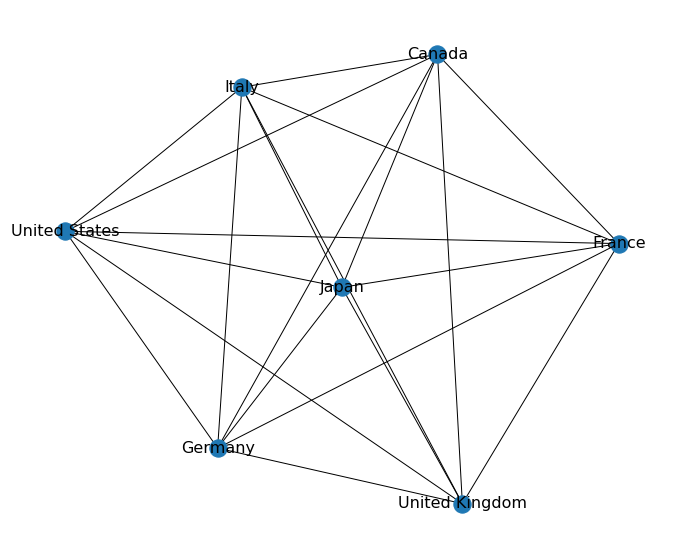

In [94]:
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row[0], row[1], weight=row[3])
    
plt.subplots(figsize=(12, 10))
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, font_size=16)
nx.draw_networkx_labels(G, pos, font_size=16)
plt.axis('off')
plt.show()

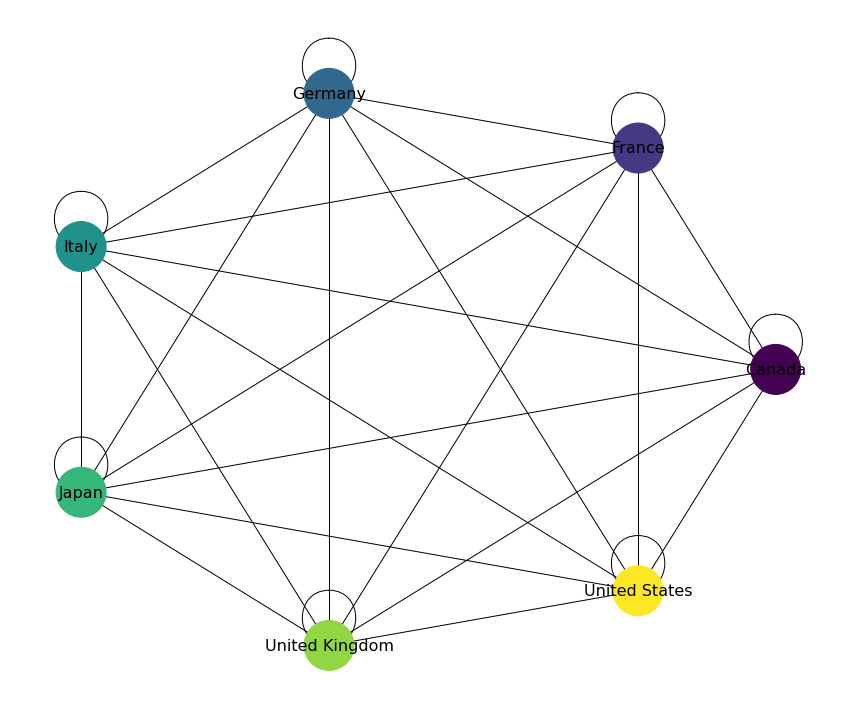

In [92]:
G = nx.cycle_graph(df['Country'])
#G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row[0], row[1], weight=row[3])
    
plt.subplots(figsize=(12,10))
pos = nx.circular_layout(G)
nx.draw_networkx_labels(G, pos=pos ,font_size=16)
nx.draw(G, pos=pos, node_color=range(7), node_size=2500, cmap=plt.cm.viridis)
plt.tight_layout()
plt.show()